In [3]:
import pandas as pd
import numpy as np
from datetime import datetime

In [4]:
# Excel file - T1 sheet
file_path = 'data/WUI_Data.xlsx'
df = pd.read_excel(file_path, sheet_name='T1')

print("Shape of data:", df.shape)
df.head(10)

Shape of data: (143, 11)


,Year,Global (simple average),Global (GDP weighted average),Advanced economies,Emerging economies,Low-income economies,Africa,Asia and the Pacific,Europe,Middle East and Central Asia,Western Hemisphere
0,1990q1,9411.204,12496.470,13599.840,8040.513,5142.676,5460.384,6085.133,14842.050,4612.296,15472.910
1,1990q2,9267.289,8769.965,8297.866,11064.610,6629.918,12754.110,9212.479,8833.553,10984.430,8050.245
2,1990q3,13230.890,16198.830,17522.030,10177.310,16612.990,17222.160,13122.700,23189.970,16790.860,10986.880
3,1990q4,10886.610,11872.270,12405.350,9755.987,7821.920,17774.520,13823.930,16097.060,19038.610,5276.455
4,1991q1,9446.463,8223.550,6740.438,14966.600,8688.795,9387.380,4772.079,10867.020,9431.762,7738.637
5,1991q2,10922.480,10483.810,8937.921,17554.590,10362.920,17124.000,7000.714,17327.350,9434.856,5576.254
6,1991q3,9657.110,6208.322,5215.462,10338.570,12018.130,17713.260,4185.288,6788.327,10650.350,6222.597
7,1991q4,8470.171,7314.133,6426.274,11707.300,2486.303,14824.910,4651.479,10582.670,13718.860,4909.727
8,1992q1,10889.000,12616.900,13047.690,10893.750,9364.922,15686.750,19180.390,14594.450,9183.998,6043.933
9,1992q2,12753.200,7358.835,6136.862,12405.220,14214.370,10585.550,4119.181,11450.990,14830.850,4652.484


In [5]:
# Create a clean dataset with only time and WUI value
global_col = [col for col in df.columns if 'global' in col.lower() and 'gdp' in col.lower()]
time_col = 'Year'
if len(global_col) > 0:
    wui_data = df[[time_col, global_col[0]]].copy()
    wui_data.columns = ['time', 'WUI']

wui_data = wui_data.dropna()

print("\nCleaned data shape:", wui_data.shape)
wui_data.head(3)


Cleaned data shape: (143, 2)


,time,WUI
0,1990q1,12496.470
1,1990q2,8769.965
2,1990q3,16198.830


In [6]:
# Convert to quarterly period
if wui_data['time'].dtype == 'object':
    try:
        wui_data['date'] = pd.PeriodIndex(wui_data['time'], freq='Q')
    except:
        def parse_quarter(q_str):
            parts = str(q_str).replace('Q', ' ').split()
            year, quarter = int(parts[0]), int(parts[1])
            return pd.Period(year=year, quarter=quarter, freq='Q')
        
        wui_data['date'] = wui_data['time'].apply(parse_quarter)
else:
    wui_data['date'] = wui_data['time'].dt.to_period('Q')

wui_data = wui_data.set_index('date')
wui_data = wui_data[['WUI']]
# print("\nData with quarterly date index:")
# print(wui_data.head(10))
# print("\nLast few rows:")
# print(wui_data.tail(10))

In [7]:
# Verify time range
print(f"Time series period: {wui_data.index.min()} to {wui_data.index.max()}")
print(f"Total number of quarters: {len(wui_data)}")

# Check for missing quarters by comparing consecutive periods
index_diff = wui_data.index.to_timestamp().to_series().diff()
missing_quarters = (index_diff > pd.Timedelta(days=100)).sum()  # More than 100 days means a gap
print(f"\nMissing quarters (if any): {missing_quarters}")

Time series period: 1990Q1 to 2025Q3
Total number of quarters: 143

Missing quarters (if any): 0


In [8]:
# Basic statistics
print("Summary statistics:")
print(wui_data.describe())

# Check for any missing values
print(f"\nMissing values: {wui_data.isna().sum().values[0]}")

Summary statistics:
                 WUI
count     143.000000
mean    19183.903497
std     12866.393623
min      5569.941000
25%     11860.835000
50%     16042.910000
75%     23137.130000
max    106862.200000

Missing values: 0


In [9]:
# Save cleaned dataset
output_file = 'data/wui_quarterly_clean.csv'
wui_data.to_csv(output_file)

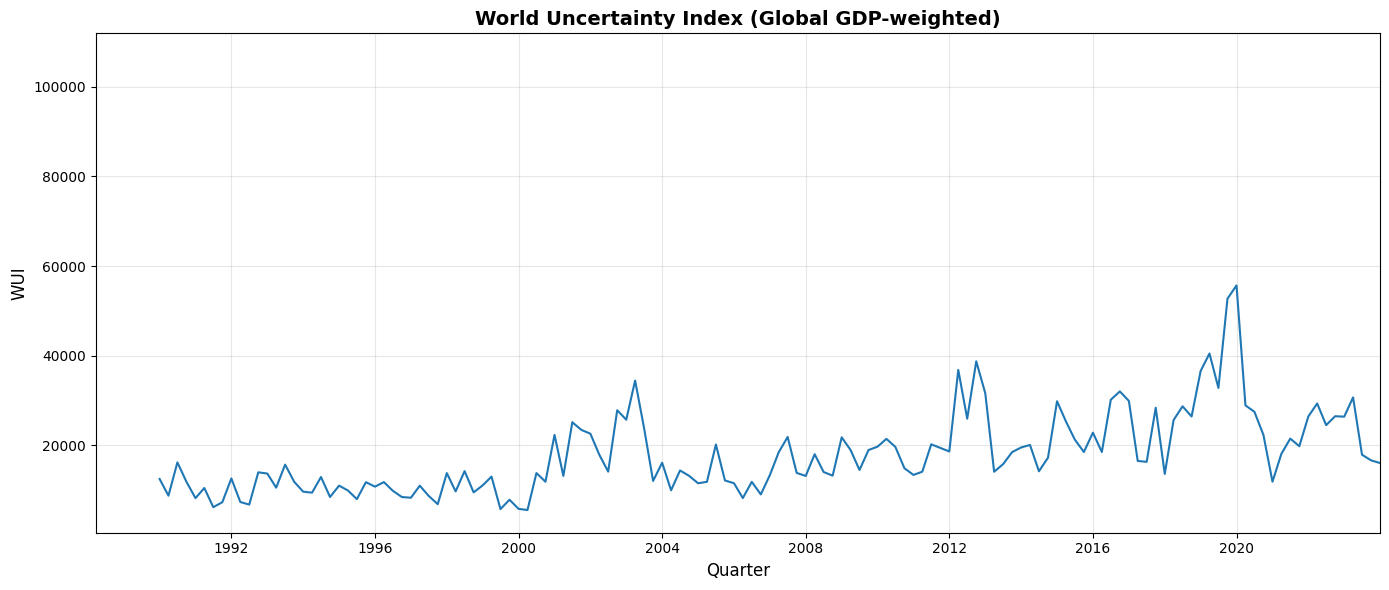

In [10]:
import matplotlib.pyplot as plt

plt.figure(figsize=(14, 6))
plt.plot(wui_data.index.to_timestamp(), wui_data['WUI'], linewidth=1.5)
plt.title('World Uncertainty Index (Global GDP-weighted)', fontsize=14, fontweight='bold')
plt.xlabel('Quarter', fontsize=12)
plt.ylabel('WUI', fontsize=12)
plt.grid(True, alpha=0.3)
# Show only data through end of 2023
plt.xlim(right=pd.Timestamp('2023-12-31'))
plt.tight_layout()
plt.show()